<a href="https://colab.research.google.com/github/zmiern/ie423/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#475468'> Heart Disease:</font>
### <font color='#475468'> Can you predict heart disease in patients?</font>

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load Data

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dfBank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bank-full.csv')

In [5]:
dfBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Analyze Data

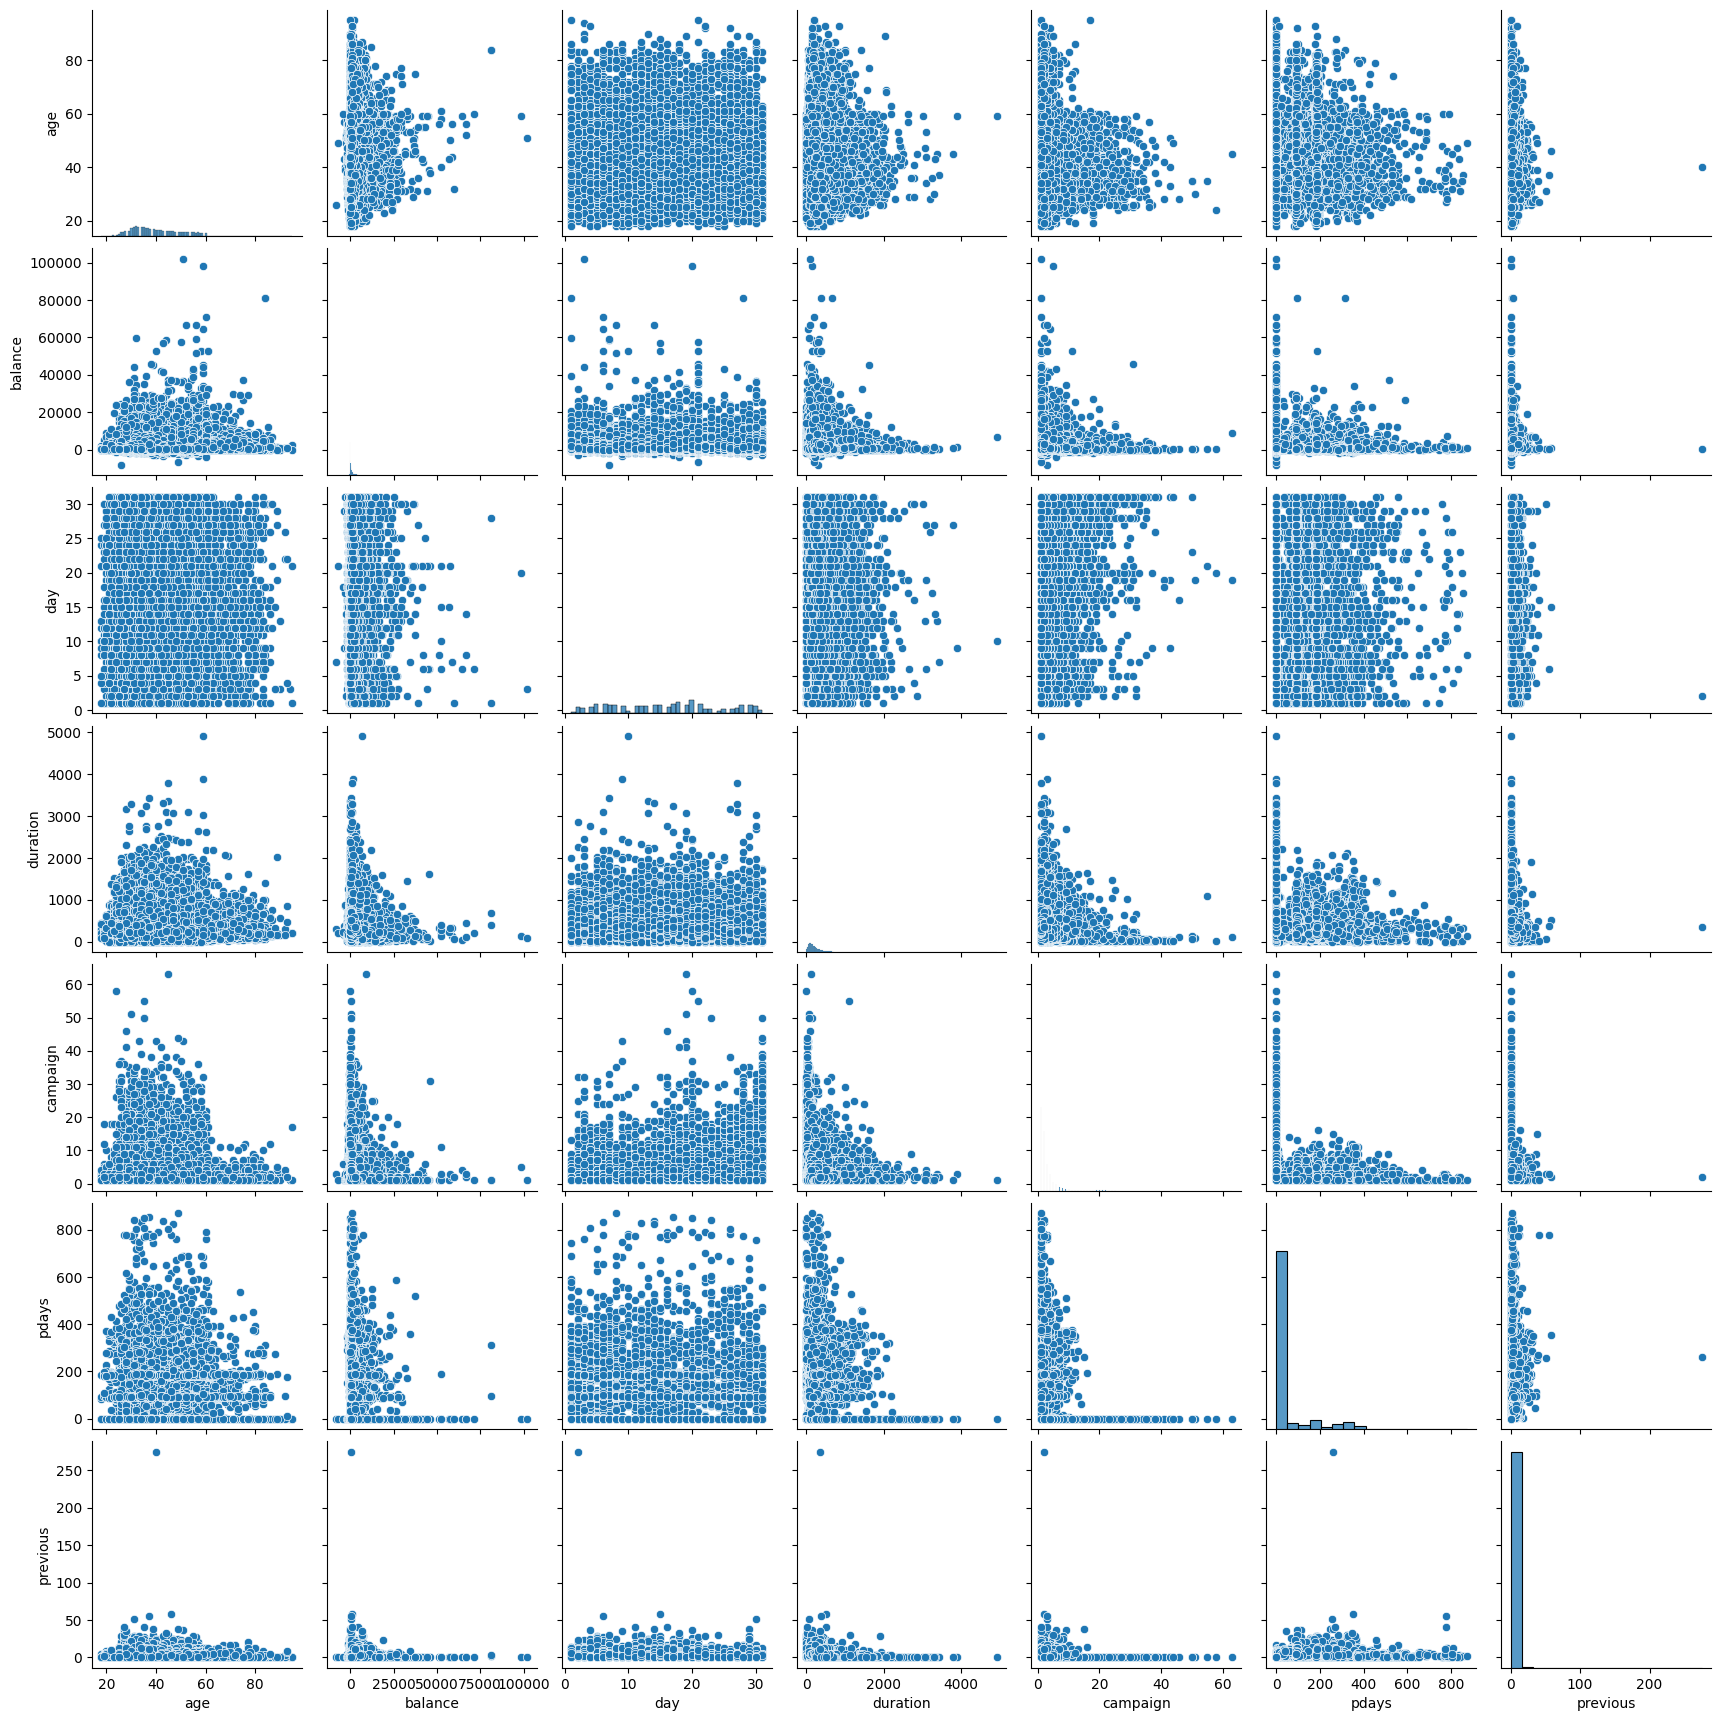

In [6]:
# Plot pair-wise relationships in the dataset
import seaborn as sns
sns.pairplot(dfBank)


There doesn't seem to be any significant correlations going on.  Let's dig deeper into the chol by age plot...

<Axes: xlabel='age', ylabel='balance'>

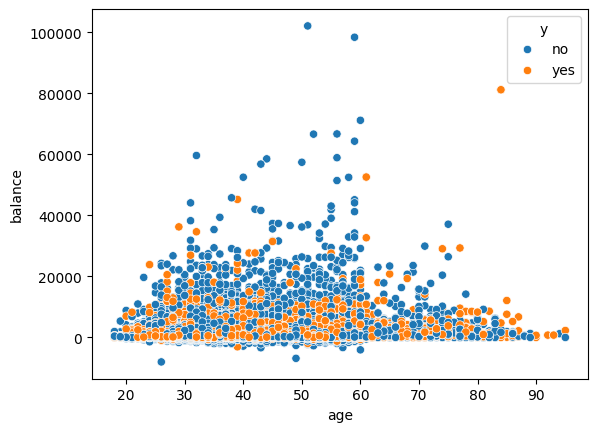

In [7]:
# 3D Scatter plot with hue
sns.scatterplot(x=dfBank['age'], y=dfBank['balance'], hue=dfBank['y'])

### Logistic Regression

In [9]:
# Scale data to eliminate the effect of feature units (especially for gradient descent cases)
from sklearn.preprocessing import scale
y = dfBank['y']
# Drop the 'y' column *before* selecting numeric types
X = dfBank.drop(['y'], axis=1)
# Now select numeric columns and scale
X = scale(X.select_dtypes(include=['number']))

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=42)

In [10]:
# Build Logistic Regression model
from sklearn.linear_model import LogisticRegression


mdlLgrBank = LogisticRegression(random_state=1)
mdlLgrBank.fit(X_train, y_train)
y_test_pred = mdlLgrBank.predict(X_test)

In [11]:
# Display model results using
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[7805  147]
 [ 893  198]]


In [12]:
# Display performance results
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.57      0.18      0.28      1091

    accuracy                           0.88      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.88      0.86      9043



In [13]:
# Display summary results
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numerical values
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_test_pred_numeric = le.transform(y_test_pred)

print ('AUC Score (Logistic Regression):')
print (roc_auc_score(y_test_numeric, y_test_pred_numeric))

AUC Score (Logistic Regression):
0.5814994803836769


### Naive Bayes


#### Naive Bayes - Gaussian


In [14]:

# Build Naive Bayes - Gaussian model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

mdlNbgBnk = GaussianNB()
mdlNbgBnk.fit(X_train,y_train)
y_test_pred = mdlNbgBnk.predict(X_test)

print ('Results (Naive Bayes - Gaussian):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

# Convert string labels to numerical values for AUC calculation
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_test_pred_numeric = le.transform(y_test_pred)

print ('AUC Score:')
print (roc_auc_score(y_test_numeric, y_test_pred_numeric)) # Use the numerical labels here

Results (Naive Bayes - Gaussian):

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.93      0.92      7952
         yes       0.42      0.35      0.38      1091

    accuracy                           0.86      9043
   macro avg       0.67      0.64      0.65      9043
weighted avg       0.85      0.86      0.86      9043

AUC Score:
0.6428937396145894


### K-Nearest Neighbor (KNN)


In [15]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

mdlKnnBnk = KNeighborsClassifier(n_neighbors=10)
mdlKnnBnk.fit(X_train, y_train)
y_test_pred = mdlKnnBnk.predict(X_test)

# Convert string labels to numerical values for AUC calculation
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_test_pred_numeric = le.transform(y_test_pred)

print ('AUC Score (K-Nearest Neighbor):')
print (roc_auc_score(y_test_numeric, y_test_pred_numeric)) # Use numerical labels

AUC Score (K-Nearest Neighbor):
0.5950694427795


### Support Vector Machines


In [16]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

mdlSvmBnk = SVC()
mdlSvmBnk.fit(X_train, y_train)
y_test_pred = mdlSvmBnk.predict(X_test)

print ('Results (Support Vector Classifier):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

# Convert string labels to numerical values for AUC calculation
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_test_pred_numeric = le.transform(y_test_pred)

print ('AUC Score:')
print (roc_auc_score(y_test_numeric, y_test_pred_numeric)) # Use numerical labels for AUC

Results (Support Vector Classifier):

Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.59      0.18      0.27      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043

AUC Score:
0.5805465815055318


In [18]:

import pandas as pd

# Assuming dfBnk is your DataFrame

# To select only numeric columns (int and float):
numeric_df = dfBank.select_dtypes(include=['number'])
print(numeric_df.head())

# To select only string columns:
string_df = dfBank.select_dtypes(include=['object'])
print(string_df.head())

# To select only float columns:
float_df = dfBank.select_dtypes(include=['float'])
print(float_df.head())


   age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0
            job  marital  education default housing loan  contact month  \
0    management  married   tertiary      no     yes   no  unknown   may   
1    technician   single  secondary      no     yes   no  unknown   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown   may   
3   blue-collar  married    unknown      no     yes   no  unknown   may   
4       unknown   single    unknown      no      no   no  unknown   may   

  poutcome   y  
0  unknown  no  
1  unknown  no  
2  unknown  no  
3  unknown  no  
4  unknown  no  
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [20]:
print(dfBank['marital'].value_counts())

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


In [21]:

print(dfBank['education'].value_counts())

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


In [22]:
print(dfBank['housing'].value_counts())

housing
yes    25130
no     20081
Name: count, dtype: int64


In [23]:
print(dfBank['loan'].value_counts())

loan
no     37967
yes     7244
Name: count, dtype: int64


In [24]:
dfBank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bank-full.csv')

In [25]:

dfBank['marital'] = dfBank['marital'].map({'divorced': 0, 'single': 0, 'married': 1})
dfBank['education'] = dfBank['education'].map({'unknown': 0, 'primary': 0, 'tertiary': 0, 'secondary': 1})
dfBank['housing'] = dfBank['housing'].map({'no': 0, 'yes': 1})
dfBank['loan'] = dfBank['loan'].map({'no': 0, 'yes': 1})
dfBank['y'] = dfBank['y'].map({'no': 0, 'yes': 1})

In [29]:
dfBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,0,no,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,0,1,no,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,1,1,no,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,1,0,no,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,0,no,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


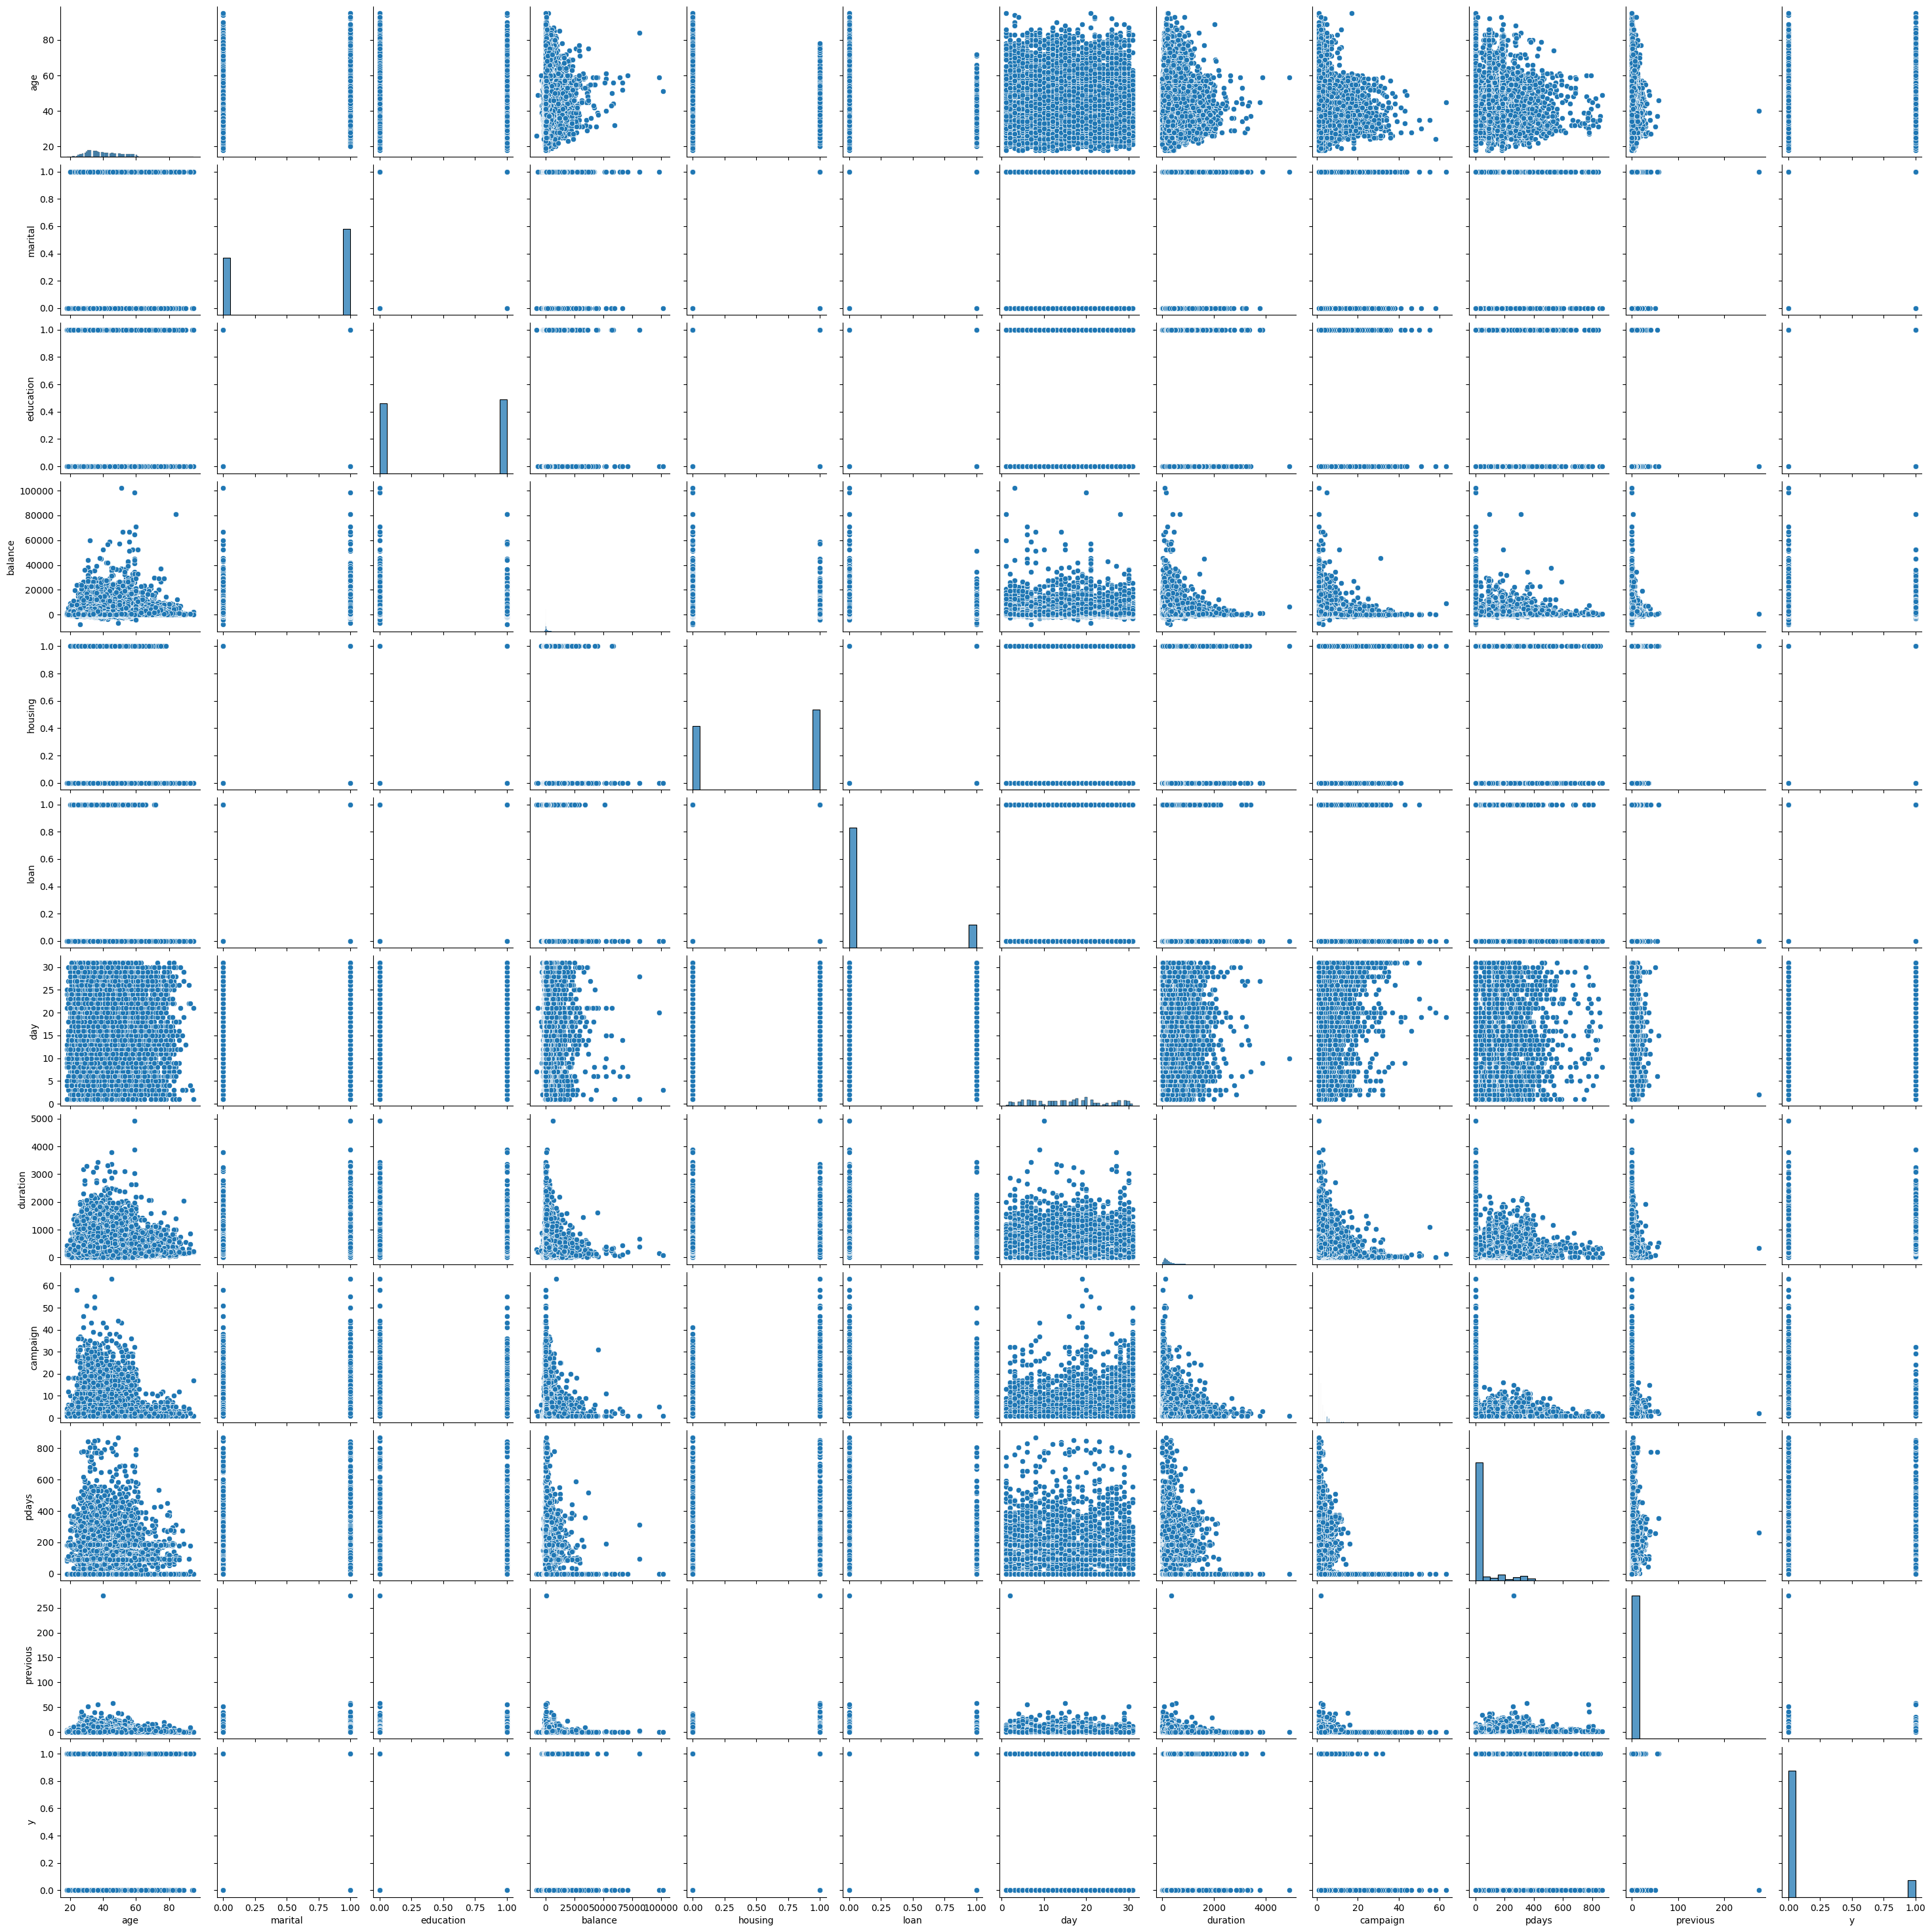

In [31]:
# Plot pair-wise relationships in the dataset
import seaborn as sns
sns.pairplot(dfBank)

<Axes: xlabel='marital', ylabel='balance'>

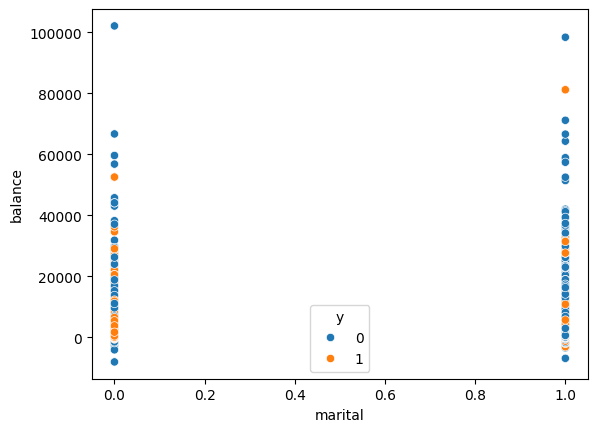

In [32]:
# 3D Scatter plot with hue
sns.scatterplot(x=dfBank['marital'], y=dfBank['balance'], hue=dfBank['y'])

<Axes: xlabel='education', ylabel='balance'>

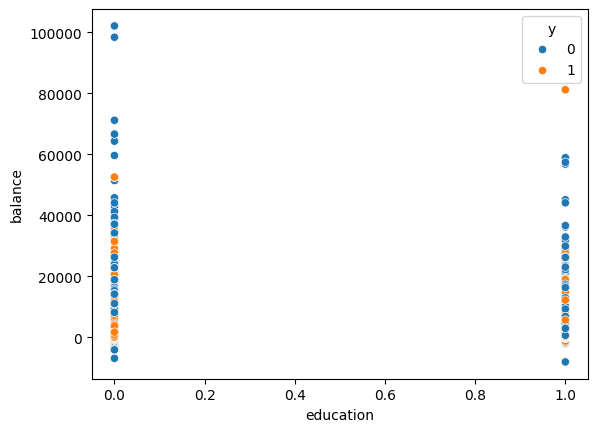

In [33]:

# 3D Scatter plot with hue
sns.scatterplot(x=dfBank['education'], y=dfBank['balance'], hue=dfBank['y'])

<Axes: xlabel='housing', ylabel='balance'>

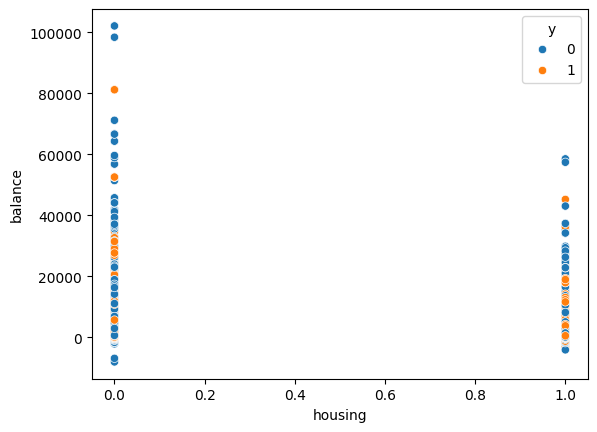

In [35]:
# 3D Scatter plot with hue
sns.scatterplot(x=dfBank['housing'], y=dfBank['balance'], hue=dfBank['y'])

<Axes: xlabel='loan', ylabel='balance'>

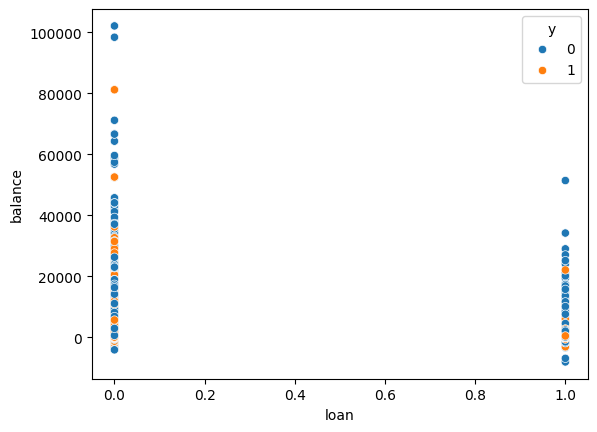

In [36]:
# 3D Scatter plot with hue
sns.scatterplot(x=dfBank['loan'], y=dfBank['balance'], hue=dfBank['y'])

### Logistic Regression

In [37]:
# Scale data to eliminate the effect of feature units (especially for gradient descent cases)
from sklearn.preprocessing import scale
y = dfBank['y']
# Drop the 'y' column *before* selecting numeric types
X = dfBank.drop(['y'], axis=1)
# Now select numeric columns and scale
X = scale(X.select_dtypes(include=['number']))

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=42)

In [38]:
# Build Logistic Regression model
from sklearn.linear_model import LogisticRegression


mdlLgrBank = LogisticRegression(random_state=1)
mdlLgrBank.fit(X_train, y_train)
y_test_pred = mdlLgrBank.predict(X_test)

In [39]:
# Display model results using
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[7791  161]
 [ 872  219]]


In [40]:
# Display performance results
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.58      0.20      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043



In [41]:

# Display summary results
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numerical values
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_test_pred_numeric = le.transform(y_test_pred)

print ('AUC Score (Logistic Regression):')
print (roc_auc_score(y_test_numeric, y_test_pred_numeric))

AUC Score (Logistic Regression):
0.5902433966770374


#### Naive Bayes - Gaussian


In [42]:


# Build Naive Bayes - Gaussian model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

mdlNbgBank = GaussianNB()
mdlNbgBank.fit(X_train,y_train)
y_test_pred = mdlNbgBank.predict(X_test)

print ('Results (Naive Bayes - Gaussian):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

# Convert string labels to numerical values for AUC calculation
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_test_pred_numeric = le.transform(y_test_pred)

print ('AUC Score:')
print (roc_auc_score(y_test_numeric, y_test_pred_numeric)) # Use the numerical labels here

Results (Naive Bayes - Gaussian):

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7952
           1       0.45      0.39      0.42      1091

    accuracy                           0.87      9043
   macro avg       0.69      0.66      0.67      9043
weighted avg       0.86      0.87      0.87      9043

AUC Score:
0.6613960227911926


### K-Nearest Neighbor (KNN)


In [43]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

mdlKnnBank = KNeighborsClassifier(n_neighbors=10)
mdlKnnBank.fit(X_train, y_train)
y_test_pred = mdlKnnBank.predict(X_test)

# Convert string labels to numerical values for AUC calculation
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_test_pred_numeric = le.transform(y_test_pred)

print ('AUC Score (K-Nearest Neighbor):')
print (roc_auc_score(y_test_numeric, y_test_pred_numeric)) # Use numerical labels

AUC Score (K-Nearest Neighbor):
0.6037770504788584


### Support Vector Machines


In [44]:

# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

mdlSvmBank = SVC()
mdlSvmBank.fit(X_train, y_train)
y_test_pred = mdlSvmBank.predict(X_test)

print ('Results (Support Vector Classifier):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

# Convert string labels to numerical values for AUC calculation
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_test_pred_numeric = le.transform(y_test_pred)

print ('AUC Score:')
print (roc_auc_score(y_test_numeric, y_test_pred_numeric)) # Use numerical labels for AUC

Results (Support Vector Classifier):

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.64      0.22      0.33      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043

AUC Score:
0.6013766489864946


## Takeaways




As to be expected, after some implementations, improvements have been made.
